# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 런타임 다시 시작

# 데이터 분석과 관련된 필수 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 및 모델링을 위한 패키지 import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Google Colab에서 드라이브 마운트
from google.colab import drive

# 기타 유용한 패키지 import
import os
import datetime
import time

# 나눔고딕 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 2.데이터 가져오기 및 확인 (df_)

In [ ]:
df_subway = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/이전 주제/교통 교통사고/서울시 행정동별 지하철 총 승차 승객수 정보.csv',
                        encoding='euc-kr')
df_bus = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/이전 주제/교통 교통사고/서울시 행정동별 버스 총 승차 승객수 정보.csv',
                     encoding='euc-kr')


In [ ]:
df_industry = pd.read_csv('/content/사업체현황+종사자수(산업대분류별_성별_동별).csv',
                          encoding='utf-8')
df_noise = pd.read_csv('/content/서울시 행정구별 소음 민원 접수 현황.csv',
                       encoding='utf-8')
df_trash = pd.read_csv('/content/서울시 행정구별 폐기물 발생 및 재활용 현황.csv',
                       encoding='utf-8')

In [ ]:
# 각 데이터프레임의 열 이름과 첫 번째 행의 값을 출력하는 함수
def print_column_names_and_first_row(dfs):
    for i, df in enumerate(dfs, 1):
        print(f"DataFrame {i}:")
        print("Columns:", df.columns.tolist())
        print("First Row:", df.iloc[0].tolist())
        print("Shape:",df.shape)
        print()

# dfs 지정
dfs=[df_subway,df_bus,df_industry,df_noise,df_trash]

# 함수 호출
print_column_names_and_first_row(dfs)

DataFrame 1:
Columns: ['기준_날짜', '행정동_ID', '지하철_승객_수', '지하철_승객_수_00시', '지하철_승객_수_01시', '지하철_승객_수_02시', '지하철_승객_수_03시', '지하철_승객_수_04시', '지하철_승객_수_05시', '지하철_승객_수_06시', '지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시', '지하철_승객_수_10시', '지하철_승객_수_11시', '지하철_승객_수_12시', '지하철_승객_수_13시', '지하철_승객_수_14시', '지하철_승객_수_15시', '지하철_승객_수_16시', '지하철_승객_수_17시', '지하철_승객_수_18시', '지하철_승객_수_19시', '지하철_승객_수_20시', '지하철_승객_수_21시', '지하철_승객_수_22시', '지하철_승객_수_23시']
First Row: [20240612.0, 1124082.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Shape: (378682, 27)

DataFrame 2:
Columns: ['기준_날짜', '행정동_ID', '버스_승객_수', '버스_승객_수_00시', '버스_승객_수_01시', '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시', '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시', '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시', '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시', '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시'

#3.산업, 소음, 폐기물 조인 및 저장

In [ ]:
df_noise.rename(columns={'자치구별':'자치구'},inplace=True)

In [ ]:
# Left Join 수행
df_total = pd.merge(df_noise, df_industry, on='자치구', how='left')
df_total = pd.merge(df_total, df_trash, on='자치구', how='left')

# 결과 확인
print(df_total.columns)
print(df_total.shape)

Index(['자치구', '환경관련 전체민원', '소음전체민원', '공장소음민원', '교통소음민원', '생활소음민원', '사업체수',
       '총종사자수', '농업 임업 및 어업', '광업', '제조업', '전기 가스 증기 및 공기조절 공급업',
       '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업',
       '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', ' 협회 및 단체 수리 및 기타 개인 서비스업',
       '발생량합계', '재활용량합계', '생활폐기물', '음식물폐기물', '사업장배출 시설계폐기물', '건설폐기물', '지정폐기물'],
      dtype='object')
(25, 34)


In [ ]:
df_total.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/자치구별 소음_산업_폐기물.csv')

# 4.버스 지하철 승객수 데이터 전처리

## 행정동코드 가져오기 (df_localcode)

In [ ]:
# 행정동코드 불러오기
df_localcode = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울시 읍면동마스터 정보.csv',
                           encoding='euc-kr')

# 서울 데이터만 추출하기
df_localcode = df_localcode[(df_localcode['시도_명칭'] == '서울')]
df_localcode.shape

(426, 4)

In [ ]:
# '행정동_ID'를 10자리 문자열로 변환
df_localcode['행정동_ID'] = df_localcode['행정동_ID'].astype(str).str.ljust(10, '0')
df_localcode.head()

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
712,1125077000,상일2동,강동구,서울
713,1125076000,상일1동,강동구,서울
714,1125074000,길동,강동구,서울
715,1125073000,천호2동,강동구,서울
716,1125072000,암사1동,강동구,서울


In [ ]:
df_localcode.describe(include='all')

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
count,426,426,426,426
unique,425,425,25,1
top,1125055000,신사동,송파구,서울
freq,2,2,27,426


In [ ]:
# df_localcode_subset에서 행정동_ID 중복 여부 확인
duplicate_ids = df_localcode[df_localcode.duplicated('행정동_ID', keep=False)]

if not duplicate_ids.empty:
    print("중복된 행정동_ID가 있습니다:")
    print(duplicate_ids)


In [ ]:
# 727번째 행 제거
df_localcode = df_localcode.drop(index=727)


## 2022년 버스, 지하철 데이터만 추출 (df_bus, subway)

In [ ]:
# '기준_날짜'가 20220000부터 20230000 사이의 값만 남기기
df_bus = df_bus[(df_bus['기준_날짜'] >= 20220000) & (df_bus['기준_날짜'] < 20230000)]

# '기준_날짜'를 문자열로 변환한 후 날짜 형식으로 변환
df_bus['기준_날짜'] = pd.to_datetime(df_bus['기준_날짜'].astype(str), format='%Y%m%d')

# 필터링 결과 출력
# print(df_bus.head())
df_bus.shape

<ipython-input-11-1e4125f2d808>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus['기준_날짜'] = pd.to_datetime(df_bus['기준_날짜'].astype(str), format='%Y%m%d')


(154760, 27)

In [ ]:
# '기준_날짜'가 20220000부터 20230000 사이의 값만 남기기
df_subway = df_subway[(df_subway['기준_날짜'] >= 20220000) & (df_subway['기준_날짜'] < 20230000)]

# '기준_날짜'를 문자열로 변환한 후 날짜 형식으로 변환
df_subway['기준_날짜'] = pd.to_datetime(df_subway['기준_날짜'].astype(str), format='%Y%m%d')

# 필터링 결과 출력
# print(df_subway.head())
df_subway.shape

<ipython-input-12-b5daf2799322>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subway['기준_날짜'] = pd.to_datetime(df_subway['기준_날짜'].astype(str), format='%Y%m%d')


(154760, 27)

In [ ]:
# '행정동_ID'를 10자리 문자열로 변환
df_bus['행정동_ID'] = df_bus['행정동_ID'].astype(str).str.ljust(10, '0')
df_bus.head()
df_bus.shape

(154760, 27)

In [ ]:
df_subway['행정동_ID'] = df_subway['행정동_ID'].astype(str).str.ljust(10, '0')
df_subway.head()
df_subway.shape

(154760, 27)

## 조인 (merged_bus)

In [ ]:
# '행정동코드'와 '시군구명'만 선택
df_localcode_subset = df_localcode[['행정동_ID', '자치구_명칭']]

# '행정동_ID'와 '행정동코드'가 일치하는 경우 '시군구명'을 조인
merged_bus = pd.merge(df_bus, df_localcode_subset, on='행정동_ID', how='left')
merged_bus.head()
merged_bus.shape

(154760, 28)

In [ ]:
# '행정동_ID'와 '행정동코드'가 일치하는 경우 '시군구명'을 조인
merged_subway = pd.merge(df_subway, df_localcode_subset, on='행정동_ID', how='left')
merged_subway.head()
merged_subway.shape

(154760, 28)

## 날짜별, 월별, 시간대별, 구별 분류 (subway_proc)

In [ ]:
merged_subway.columns

Index(['기준_날짜', '행정동_ID', '지하철_승객_수', '지하철_승객_수_00시', '지하철_승객_수_01시',
       '지하철_승객_수_02시', '지하철_승객_수_03시', '지하철_승객_수_04시', '지하철_승객_수_05시',
       '지하철_승객_수_06시', '지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시',
       '지하철_승객_수_10시', '지하철_승객_수_11시', '지하철_승객_수_12시', '지하철_승객_수_13시',
       '지하철_승객_수_14시', '지하철_승객_수_15시', '지하철_승객_수_16시', '지하철_승객_수_17시',
       '지하철_승객_수_18시', '지하철_승객_수_19시', '지하철_승객_수_20시', '지하철_승객_수_21시',
       '지하철_승객_수_22시', '지하철_승객_수_23시', '자치구_명칭'],
      dtype='object')

In [ ]:
# 00시부터 23시까지의 열 이름 생성
columns = [f'지하철_승객_수_{str(i).zfill(2)}시' for i in range(24)]

In [ ]:
# 각 그룹의 합산 열 추가
for i in range(0, 24, 4):
    group_columns = columns[i:i+4]
    group_name = f'지하철_승객_수_{str(i).zfill(2)}시-{str(i+3).zfill(2)}시'
    merged_subway[group_name] = merged_subway[group_columns].sum(axis=1)

# 불필요한 개별 열 제거 (선택 사항)
merged_subway = merged_subway.drop(columns=columns)

# 결과 확인
print(merged_subway.head())

       기준_날짜      행정동_ID  지하철_승객_수 자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  \
0 2022-12-31  1113069000    1952.0   서대문구               3.0             143.0   
1 2022-12-31  1113052000    5355.0   서대문구              29.0             356.0   
2 2022-12-31  1112068000     385.0    은평구               0.0              27.0   
3 2022-12-31  1112073000       NaN    은평구               0.0               0.0   
4 2022-12-31  1112056000    5278.0    은평구              13.0             463.0   

   지하철_승객_수_08시-11시  지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시  
0             555.0             617.0             442.0             192.0  
1            1322.0            1854.0            1320.0             474.0  
2             112.0             125.0              76.0              45.0  
3               0.0               0.0               0.0               0.0  
4            1568.0            1635.0            1187.0             412.0  


In [ ]:
import pandas as pd

# 기준 날짜에서 월과 요일을 추출하여 새로운 열 추가
merged_subway['월'] = pd.to_datetime(merged_subway['기준_날짜']).dt.month
merged_subway['요일'] = pd.to_datetime(merged_subway['기준_날짜']).dt.day_name()

# 결과 확인
print(merged_subway.head())


       기준_날짜      행정동_ID  지하철_승객_수 자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  \
0 2022-12-31  1113069000    1952.0   서대문구               3.0             143.0   
1 2022-12-31  1113052000    5355.0   서대문구              29.0             356.0   
2 2022-12-31  1112068000     385.0    은평구               0.0              27.0   
3 2022-12-31  1112073000       NaN    은평구               0.0               0.0   
4 2022-12-31  1112056000    5278.0    은평구              13.0             463.0   

   지하철_승객_수_08시-11시  지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시   월  \
0             555.0             617.0             442.0             192.0  12   
1            1322.0            1854.0            1320.0             474.0  12   
2             112.0             125.0              76.0              45.0  12   
3               0.0               0.0               0.0               0.0  12   
4            1568.0            1635.0            1187.0             412.0  12   

         요일  
0  Saturday 

In [ ]:
merged_subway.columns

Index(['기준_날짜', '행정동_ID', '지하철_승객_수', '자치구_명칭', '지하철_승객_수_00시-03시',
       '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시',
       '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시', '월', '요일'],
      dtype='object')

In [ ]:
#각 월과 요일별로 승객 수를 합산하는 새로운 열 생성
for month in range(1, 13):
    merged_subway[f'{month}월'] = merged_subway.apply(lambda row: row['지하철_승객_수'] if row['월'] == month else 0, axis=1)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
korean_days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for eng_day, kor_day in zip(days_of_week, korean_days):
    merged_subway[kor_day] = merged_subway.apply(lambda row: row['지하철_승객_수'] if row['요일'] == eng_day else 0, axis=1)

# 자치구명칭을 기준으로 그룹화하여 시간대별, 월별, 요일별 승객 수 합산
grouped_subway = merged_subway.groupby('자치구_명칭').agg({
    '지하철_승객_수_00시-03시': 'sum',
    '지하철_승객_수_04시-07시': 'sum',
    '지하철_승객_수_08시-11시': 'sum',
    '지하철_승객_수_12시-15시': 'sum',
    '지하철_승객_수_16시-19시': 'sum',
    '지하철_승객_수_20시-23시': 'sum',
    '1월': 'sum',
    '2월': 'sum',
    '3월': 'sum',
    '4월': 'sum',
    '5월': 'sum',
    '6월': 'sum',
    '7월': 'sum',
    '8월': 'sum',
    '9월': 'sum',
    '10월': 'sum',
    '11월': 'sum',
    '12월': 'sum',
    '월요일': 'sum',
    '화요일': 'sum',
    '수요일': 'sum',
    '목요일': 'sum',
    '금요일': 'sum',
    '토요일': 'sum',
    '일요일': 'sum'
}).reset_index()

# 결과 확인
print(grouped_subway.head())


  자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  지하철_승객_수_08시-11시  \
0    강남구          237397.0         6427164.0        18752300.0   
1    강동구           36669.0         7551265.0        13475073.0   
2    강북구           16253.0         5948426.0         9641268.0   
3    강서구           49779.0        11410630.0        19549838.0   
4    관악구          125636.0        13043593.0        28588735.0   

   지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시          1월  \
0        29329217.0        72071798.0        29338769.0  11962723.0   
1         9044874.0        10623104.0         3801920.0   3485713.0   
2         6283838.0         6175350.0         2284838.0   2334869.0   
3        13687755.0        17990173.0         6552202.0   5364822.0   
4        16162541.0        17547046.0         9262686.0   6412197.0   

           2월          3월  ...         10월         11월         12월  \
0  10049991.0  10784807.0  ...  14330295.0  14435905.0  14314092.0   
1   2963301.0   3271783.0  ...   406

In [ ]:
# 총 승객 수 계산 및 새로운 열 추가
grouped_subway['총 승객수'] = grouped_subway[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']].sum(axis=1)

# 결과 확인
print(grouped_subway.head())


  자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  지하철_승객_수_08시-11시  \
0    강남구          237397.0         6427164.0        18752300.0   
1    강동구           36669.0         7551265.0        13475073.0   
2    강북구           16253.0         5948426.0         9641268.0   
3    강서구           49779.0        11410630.0        19549838.0   
4    관악구          125636.0        13043593.0        28588735.0   

   지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시          1월  \
0        29329217.0        72071798.0        29338769.0  11962723.0   
1         9044874.0        10623104.0         3801920.0   3485713.0   
2         6283838.0         6175350.0         2284838.0   2334869.0   
3        13687755.0        17990173.0         6552202.0   5364822.0   
4        16162541.0        17547046.0         9262686.0   6412197.0   

           2월          3월  ...         11월         12월         월요일  \
0  10049991.0  10784807.0  ...  14435905.0  14314092.0  23620348.0   
1   2963301.0   3271783.0  ...   397

In [ ]:
grouped_subway.columns

Index(['자치구_명칭', '지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시',
       '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시', '1월', '2월',
       '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', '월요일',
       '화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '총 승객수'],
      dtype='object')

In [ ]:
# 컬럼명을 짧은 단어로 변경
grouped_subway.rename(columns={
    '자치구_명칭': '자치구',
    '지하철_승객_수_00시-03시': 'Late Night',
    '지하철_승객_수_04시-07시': 'Early Morning',
    '지하철_승객_수_08시-11시': 'Morning',
    '지하철_승객_수_12시-15시': 'Afternoon',
    '지하철_승객_수_16시-19시': 'Evening',
    '지하철_승객_수_20시-23시': 'Night',
    '월요일': 'Monday',
    '화요일': 'Tuesday',
    '수요일': 'Wednesday',
    '목요일': 'Thursday',
    '금요일': 'Friday',
    '토요일': 'Saturday',
    '일요일': 'Sunday',
    '총 승객수': '총지하철승객'
}, inplace=True)

# 결과 확인
print(grouped_subway.columns)

Index(['자치구', 'Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening',
       'Night', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월',
       '11월', '12월', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', '총지하철승객'],
      dtype='object')


## bus_proc

In [ ]:
merged_bus.columns

Index(['기준_날짜', '행정동_ID', '버스_승객_수', '버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시', '자치구_명칭'],
      dtype='object')

In [ ]:
# 00시부터 23시까지의 열 이름 생성
columns = [f'버스_승객_수_{str(i).zfill(2)}시' for i in range(24)]

# 각 그룹의 합산 열 추가
for i in range(0, 24, 4):
    group_columns = columns[i:i+4]
    group_name = f'버스_승객_수_{str(i).zfill(2)}시-{str(i+3).zfill(2)}시'
    merged_bus[group_name] = merged_bus[group_columns].sum(axis=1)

# 불필요한 개별 열 제거 (선택 사항)
merged_bus = merged_bus.drop(columns=columns)

# 결과 확인
print(merged_bus.head())

       기준_날짜      행정동_ID  버스_승객_수 자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  \
0 2022-12-31  1113069000   7054.0   서대문구            104.0            459.0   
1 2022-12-31  1113052000   7581.0   서대문구             46.0            495.0   
2 2022-12-31  1112068000   4280.0    은평구             52.0            340.0   
3 2022-12-31  1112073000   8613.0    은평구             98.0            525.0   
4 2022-12-31  1112056000   7274.0    은평구            137.0            384.0   

   버스_승객_수_08시-11시  버스_승객_수_12시-15시  버스_승객_수_16시-19시  버스_승객_수_20시-23시  
0           1624.0           2245.0           1727.0            895.0  
1           1750.0           2453.0           2034.0            803.0  
2           1131.0           1249.0           1015.0            493.0  
3           1797.0           2488.0           2438.0           1267.0  
4           1397.0           1873.0           2028.0           1455.0  


In [ ]:
# 기준 날짜에서 월과 요일을 추출하여 새로운 열 추가
merged_bus['월'] = pd.to_datetime(merged_bus['기준_날짜']).dt.month
merged_bus['요일'] = pd.to_datetime(merged_bus['기준_날짜']).dt.day_name()

# 결과 확인
print(merged_bus.head())

       기준_날짜      행정동_ID  버스_승객_수 자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  \
0 2022-12-31  1113069000   7054.0   서대문구            104.0            459.0   
1 2022-12-31  1113052000   7581.0   서대문구             46.0            495.0   
2 2022-12-31  1112068000   4280.0    은평구             52.0            340.0   
3 2022-12-31  1112073000   8613.0    은평구             98.0            525.0   
4 2022-12-31  1112056000   7274.0    은평구            137.0            384.0   

   버스_승객_수_08시-11시  버스_승객_수_12시-15시  버스_승객_수_16시-19시  버스_승객_수_20시-23시   월  \
0           1624.0           2245.0           1727.0            895.0  12   
1           1750.0           2453.0           2034.0            803.0  12   
2           1131.0           1249.0           1015.0            493.0  12   
3           1797.0           2488.0           2438.0           1267.0  12   
4           1397.0           1873.0           2028.0           1455.0  12   

         요일  
0  Saturday  
1  Saturday  
2  Saturday  
3  Saturday 

In [ ]:
#각 월과 요일별로 승객 수를 합산하는 새로운 열 생성
for month in range(1, 13):
    merged_bus[f'{month}월'] = merged_bus.apply(lambda row: row['버스_승객_수'] if row['월'] == month else 0, axis=1)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
korean_days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for eng_day, kor_day in zip(days_of_week, korean_days):
    merged_bus[kor_day] = merged_bus.apply(lambda row: row['버스_승객_수'] if row['요일'] == eng_day else 0, axis=1)

# 자치구명칭을 기준으로 그룹화하여 시간대별, 월별, 요일별 승객 수 합산
grouped_bus = merged_bus.groupby('자치구_명칭').agg({
    '버스_승객_수_00시-03시': 'sum',
    '버스_승객_수_04시-07시': 'sum',
    '버스_승객_수_08시-11시': 'sum',
    '버스_승객_수_12시-15시': 'sum',
    '버스_승객_수_16시-19시': 'sum',
    '버스_승객_수_20시-23시': 'sum',
    '1월': 'sum',
    '2월': 'sum',
    '3월': 'sum',
    '4월': 'sum',
    '5월': 'sum',
    '6월': 'sum',
    '7월': 'sum',
    '8월': 'sum',
    '9월': 'sum',
    '10월': 'sum',
    '11월': 'sum',
    '12월': 'sum',
    '월요일': 'sum',
    '화요일': 'sum',
    '수요일': 'sum',
    '목요일': 'sum',
    '금요일': 'sum',
    '토요일': 'sum',
    '일요일': 'sum'
}).reset_index()

# 결과 확인
print(grouped_bus.head())


  자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  버스_승객_수_08시-11시  버스_승객_수_12시-15시  \
0    강남구        1198054.0        8545205.0       22822464.0       21227205.0   
1    강동구         227345.0        3372227.0        6307342.0        5958895.0   
2    강북구         394132.0        7387652.0       13518527.0       12970243.0   
3    강서구         373945.0        6883149.0       13391213.0       12170735.0   
4    관악구         598769.0       10715775.0       21226602.0       18347491.0   

   버스_승객_수_16시-19시  버스_승객_수_20시-23시         1월         2월         3월  ...  \
0       31243378.0       17218685.0  7796272.0  6687447.0  7502696.0  ...   
1        7736649.0        4056291.0  2090454.0  1825110.0  2053614.0  ...   
2       15688518.0        8060050.0  4466101.0  3894539.0  4382599.0  ...   
3       15378167.0        7670116.0  4287110.0  3727510.0  4165953.0  ...   
4       24560420.0       14642269.0  6949650.0  6136952.0  7043064.0  ...   

         10월        11월        12월         월요일         화

In [ ]:
# 총 승객 수 계산 및 새로운 열 추가
grouped_bus['총 승객수'] = grouped_bus[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']].sum(axis=1)

# 결과 확인
print(grouped_bus.head())


  자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  버스_승객_수_08시-11시  버스_승객_수_12시-15시  \
0    강남구        1198054.0        8545205.0       22822464.0       21227205.0   
1    강동구         227345.0        3372227.0        6307342.0        5958895.0   
2    강북구         394132.0        7387652.0       13518527.0       12970243.0   
3    강서구         373945.0        6883149.0       13391213.0       12170735.0   
4    관악구         598769.0       10715775.0       21226602.0       18347491.0   

   버스_승객_수_16시-19시  버스_승객_수_20시-23시         1월         2월         3월  ...  \
0       31243378.0       17218685.0  7796272.0  6687447.0  7502696.0  ...   
1        7736649.0        4056291.0  2090454.0  1825110.0  2053614.0  ...   
2       15688518.0        8060050.0  4466101.0  3894539.0  4382599.0  ...   
3       15378167.0        7670116.0  4287110.0  3727510.0  4165953.0  ...   
4       24560420.0       14642269.0  6949650.0  6136952.0  7043064.0  ...   

         11월        12월         월요일         화요일         

In [ ]:
# 컬럼명을 짧은 단어로 변경
grouped_bus.rename(columns={
    '자치구_명칭': '자치구',
    '버스_승객_수_00시-03시': 'Late Night',
    '버스_승객_수_04시-07시': 'Early Morning',
    '버스_승객_수_08시-11시': 'Morning',
    '버스_승객_수_12시-15시': 'Afternoon',
    '버스_승객_수_16시-19시': 'Evening',
    '버스_승객_수_20시-23시': 'Night',
    '월요일': 'Monday',
    '화요일': 'Tuesday',
    '수요일': 'Wednesday',
    '목요일': 'Thursday',
    '금요일': 'Friday',
    '토요일': 'Saturday',
    '일요일': 'Sunday',
    '총 승객수': '총버스승객'
}, inplace=True)

# 결과 확인
print(grouped_bus.head())

   자치구  Late Night  Early Morning     Morning   Afternoon     Evening  \
0  강남구   1198054.0      8545205.0  22822464.0  21227205.0  31243378.0   
1  강동구    227345.0      3372227.0   6307342.0   5958895.0   7736649.0   
2  강북구    394132.0      7387652.0  13518527.0  12970243.0  15688518.0   
3  강서구    373945.0      6883149.0  13391213.0  12170735.0  15378167.0   
4  관악구    598769.0     10715775.0  21226602.0  18347491.0  24560420.0   

        Night         1월         2월         3월  ...        11월        12월  \
0  17218685.0  7796272.0  6687447.0  7502696.0  ...  8839656.0  8674546.0   
1   4056291.0  2090454.0  1825110.0  2053614.0  ...  2404454.0  2415809.0   
2   8060050.0  4466101.0  3894539.0  4382599.0  ...  4988520.0  5065117.0   
3   7670116.0  4287110.0  3727510.0  4165953.0  ...  4827409.0  4937327.0   
4  14642269.0  6949650.0  6136952.0  7043064.0  ...  7690174.0  7623588.0   

       Monday     Tuesday   Wednesday    Thursday      Friday    Saturday  \
0  15019393.0  160957

# 4.스케일링

## 표준화(subway_proc)

In [ ]:
# 데이터프레임 복사
subway_proc = grouped_subway.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 자치구와 총지하철승객을 제외한 나머지 열을 총 승객수로 나누기
for col in subway_proc.columns:
    if col not in ['자치구', '총지하철승객']:
        subway_proc[col] = subway_proc[col] / subway_proc['총지하철승객']

# 총 승객수에 대해 min-max 표준화
scaler = MinMaxScaler()
subway_proc['총지하철승객'] = scaler.fit_transform(subway_proc[['총지하철승객']])

# 결과 확인
print(subway_proc.head())


In [ ]:
# 데이터프레임 복사
bus_proc = grouped_bus.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 자치구와 총지하철승객을 제외한 나머지 열을 총 승객수로 나누기
for col in bus_proc.columns:
    if col not in ['자치구', '총버스승객']:
        bus_proc[col] = bus_proc[col] / bus_proc['총버스승객']

# 총 승객수에 대해 min-max 표준화
scaler = MinMaxScaler()
bus_proc['총버스승객'] = scaler.fit_transform(bus_proc[['총버스승객']])

# 결과 확인
print(bus_proc.head())


   자치구  Late Night  Early Morning   Morning  Afternoon   Evening     Night  \
0  강남구    0.011716       0.083568  0.223192   0.207591  0.305544  0.168390   
1  강동구    0.008220       0.121923  0.228041   0.215443  0.279718  0.146655   
2  강북구    0.006793       0.127331  0.233001   0.223551  0.270403  0.138921   
3  강서구    0.006693       0.123205  0.239697   0.217851  0.275262  0.137292   
4  관악구    0.006646       0.118943  0.235612   0.203654  0.272617  0.162527   

         1월        2월        3월  ...       11월       12월    Monday   Tuesday  \
0  0.076243  0.065400  0.073372  ...  0.086447  0.084832  0.146882  0.157408   
1  0.075580  0.065987  0.074248  ...  0.086933  0.087343  0.145878  0.153985   
2  0.076976  0.067125  0.075537  ...  0.085981  0.087301  0.145500  0.151039   
3  0.076737  0.066721  0.074569  ...  0.086408  0.088376  0.147764  0.155124   
4  0.077140  0.068119  0.078177  ...  0.085360  0.084621  0.146109  0.152785   

   Wednesday  Thursday    Friday  Saturday    Sund

# 3.분석

## 자치구별 시간대 패턴 분석

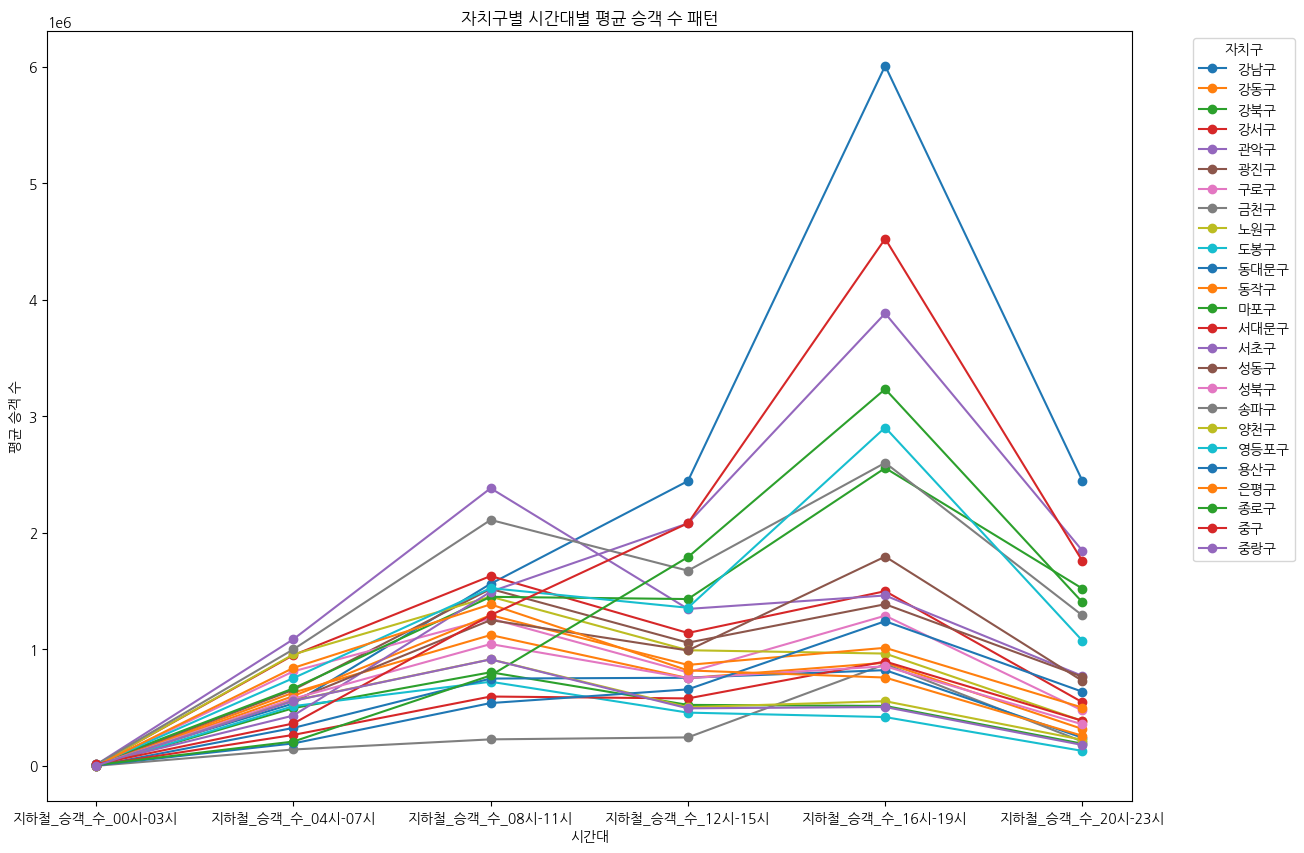

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 시간대별 평균 승객 수 계산
mean_passengers_by_gu = subway_proc.groupby('자치구_명칭')[['지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시']].mean()

# 자치구별 시간대별 승객 수 패턴 시각화
plt.figure(figsize=(14, 10))

for gu in mean_passengers_by_gu.index:
    plt.plot(mean_passengers_by_gu.columns, mean_passengers_by_gu.loc[gu], marker='o', label=gu)

plt.xlabel('시간대')
plt.ylabel('평균 승객 수')
plt.title('자치구별 시간대별 평균 승객 수 패턴')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

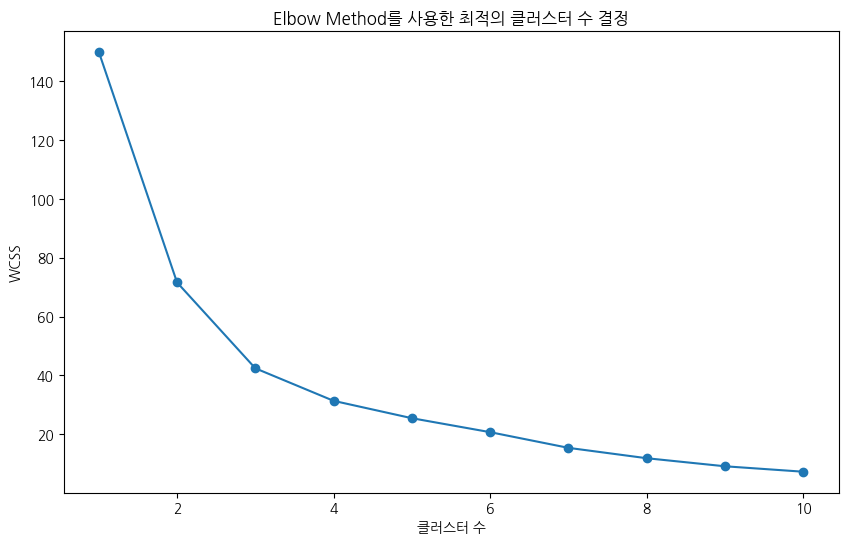

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


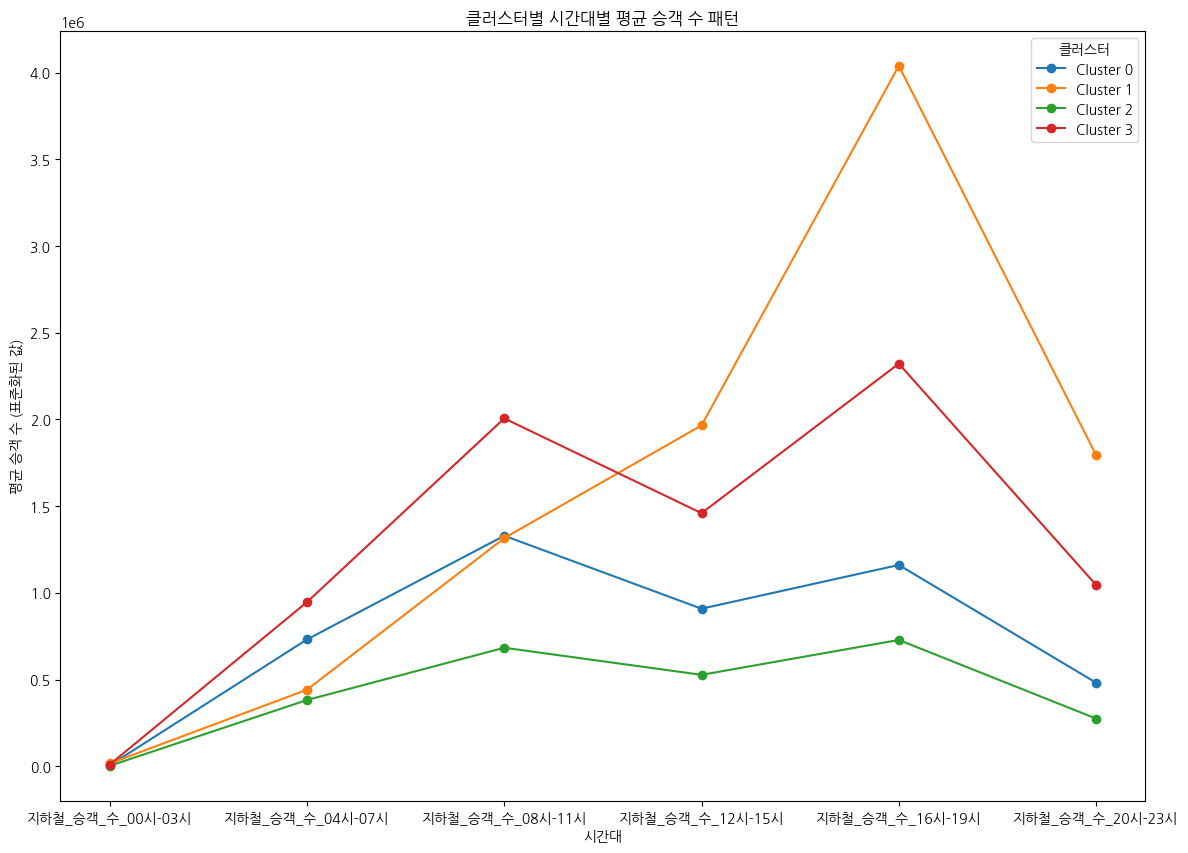

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 시간대별 평균 승객 수 데이터 준비
data = subway_proc.groupby('자치구_명칭')[['지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시']].mean()

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 최적의 군집 수 결정 (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.title('Elbow Method를 사용한 최적의 클러스터 수 결정')
plt.show()

# K-평균 클러스터링 (클러스터 수는 Elbow Method를 사용하여 결정)
optimal_clusters = 4  # 예시로 3을 선택 (Elbow Method 그래프를 통해 최적의 클러스터 수를 확인하세요)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 클러스터 레이블을 데이터프레임에 추가
data['Cluster'] = clusters

# 클러스터별 패턴 시각화
plt.figure(figsize=(14, 10))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster].drop(columns='Cluster').mean()
    plt.plot(cluster_data.index, cluster_data.values, marker='o', label=f'Cluster {cluster}')

plt.xlabel('시간대')
plt.ylabel('평균 승객 수 (표준화된 값)')
plt.title('클러스터별 시간대별 평균 승객 수 패턴')
plt.legend(title='클러스터')
plt.show()


In [ ]:
# 각 클러스터에 속한 자치구 이름 출력
for cluster in range(optimal_clusters):
    cluster_gu_names = data[data['Cluster'] == cluster].index.tolist()
    print(f'클러스터 {cluster}: {cluster_gu_names}')

클러스터 0: ['강동구', '강서구', '광진구', '구로구', '노원구', '동작구', '성동구', '성북구', '은평구']
클러스터 1: ['강남구', '마포구', '서초구', '종로구', '중구']
클러스터 2: ['강북구', '금천구', '도봉구', '동대문구', '서대문구', '양천구', '용산구', '중랑구']
클러스터 3: ['관악구', '송파구', '영등포구']


# 5.각 유형별 클러스터링

'남자', '여자'

'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'

'1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'

'10대', '20대', '30대', '40대', '50대', '60대',   '70대', '80대 이상'

'Afternoon', 'Early Morning',   'Evening', 'Late Night', 'Morning', 'Night'

In [ ]:
# 클러스터할 이름 지정
scaled2 = subway_proc.copy()

In [ ]:

# 자치구를 인덱스로 설정
scaled2.set_index('자치구', inplace=True)

##2.요일별(4개)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



요일별클러스터 0:
['중랑구', '서초구', '서대문구', '중구', '동작구', '양천구', '영등포구', '성동구', '노원구', '구로구', '은평구', '강서구', '강동구', '성북구']

요일별클러스터 1:
['금천구']

요일별클러스터 2:
['용산구', '종로구', '마포구', '동대문구', '도봉구', '광진구', '관악구', '강북구', '송파구']

요일별클러스터 3:
['강남구']

           Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
요일별클러스터                                                                       
0        0.148236  0.156601   0.158250  0.164386  0.167277  0.119441  0.085808
1        0.162310  0.171692   0.173721  0.180755  0.178796  0.080209  0.052517
2        0.142981  0.150702   0.152446  0.158711  0.164132  0.132174  0.098853
3        0.151261  0.161785   0.164163  0.172063  0.174070  0.108463  0.068196


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabor

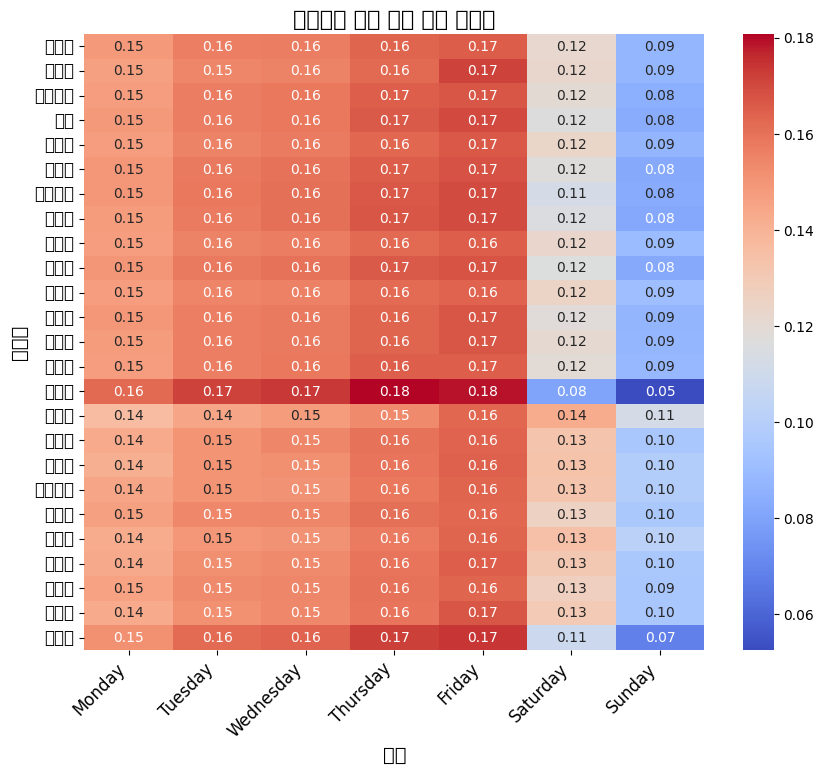

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

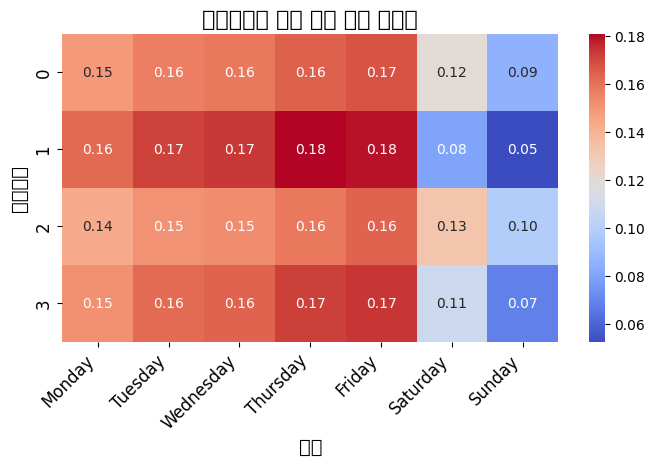

In [ ]:
# 클러스터 변수 설정
columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
cluster_name='요일별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 오토인코더 사용

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# 데이터 준비 (scaled2에서 요일 데이터만 사용)
data = scaled2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# 오토인코더 모델 정의
input_dim = data.shape[1]
encoding_dim = 5  # 잠재 공간의 차원

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 오토인코더 학습
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)

# 데이터 변환
encoded_data = encoder.predict(data)

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# 클러스터 결과를 데이터프레임에 추가
scaled2['Autoencoder_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['Autoencoder_클러스터'].unique()):
    print()
    print(f"Autoencoder 클러스터 {cluster}:")
    print(scaled2[scaled2['Autoencoder_클러스터'] == cluster].index.tolist())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/50
1/1 [==============================] - 1s 871ms/step - loss: 0.6931
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6928
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6924
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6921
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6917
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6914
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6910
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6907
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6903
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6899
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6896
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6892
Epoch 13/50
1/1 [==============================] - 0s 17ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


###t-SNE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


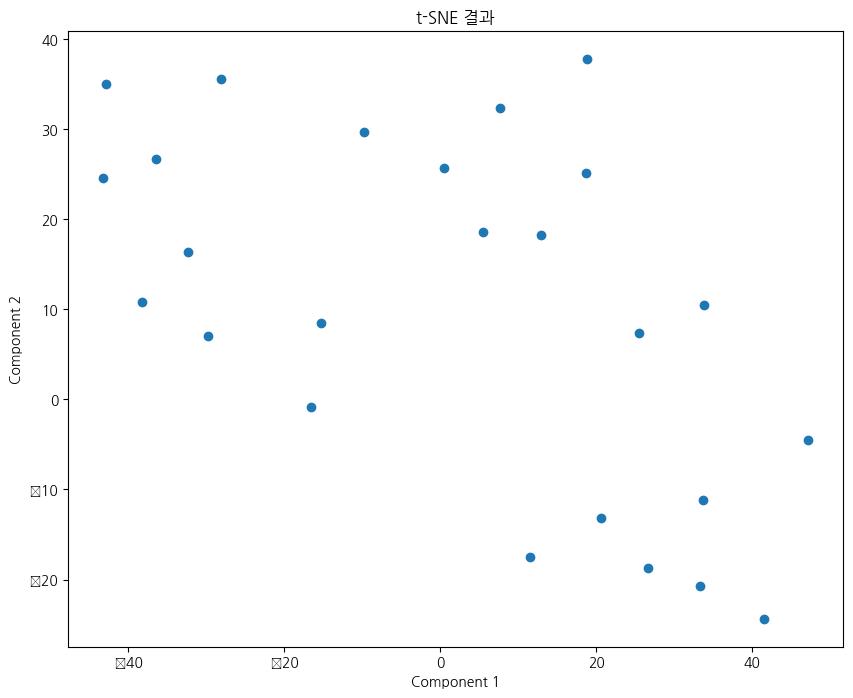


tSNE 클러스터 0:
['강동구', '구로구', '동대문구', '동작구', '중랑구']

tSNE 클러스터 1:
['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구', '중구']

tSNE 클러스터 2:
['강북구', '관악구', '광진구', '노원구', '도봉구', '마포구', '용산구']

tSNE 클러스터 3:
['강남구', '금천구', '서대문구', '양천구']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# t-SNE 적용
perplexity_value = min(5, data.shape[0] - 1)  # 데이터 샘플 수보다 작은 perplexity 설정
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_result = tsne.fit_transform(data)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE 결과')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(tsne_result)

# 클러스터 결과를 데이터프레임에 추가
scaled2['tSNE_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['tSNE_클러스터'].unique()):
    print()
    print(f"tSNE 클러스터 {cluster}:")
    print(scaled2[scaled2['tSNE_클러스터'] == cluster].index.tolist())


###DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# 데이터 준비 (scaled2에서 요일 데이터만 사용)
data = scaled2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# DBSCAN 적용
eps_value = 0.03  # 예시로 eps 값을 작게 설정
min_samples_value = 2  # 예시로 최소 샘플 수를 작게 설정
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(data)

# 클러스터 결과를 데이터프레임에 추가
scaled2['DBSCAN_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['DBSCAN_클러스터'].unique()):
    print()
    print(f"DBSCAN 클러스터 {cluster}:")
    print(scaled2[scaled2['DBSCAN_클러스터'] == cluster].index.tolist())



DBSCAN 클러스터 -1:
['강서구', '구로구', '금천구', '노원구', '도봉구', '성동구', '영등포구', '은평구', '종로구', '중구', '중랑구']

DBSCAN 클러스터 0:
['강남구', '강동구', '동대문구', '동작구', '서대문구', '양천구']

DBSCAN 클러스터 1:
['강북구', '관악구', '광진구', '마포구', '용산구']

DBSCAN 클러스터 2:
['서초구', '성북구', '송파구']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###GMM

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM 적용
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(data)

# 클러스터 결과를 데이터프레임에 추가
scaled2['GMM_클러스터'] = clusters

# 각 클러스터에 포함된 자치구 확인
for cluster in sorted(scaled2['GMM_클러스터'].unique()):
    print()
    print(f"GMM 클러스터 {cluster}:")
    print(scaled2[scaled2['GMM_클러스터'] == cluster].index.tolist())



GMM 클러스터 0:
['구로구', '종로구']

GMM 클러스터 1:
['강북구', '관악구', '광진구', '금천구', '도봉구', '마포구', '성동구', '용산구']

GMM 클러스터 2:
['강서구', '서초구', '성북구', '송파구', '영등포구', '은평구', '중구']

GMM 클러스터 3:
['강남구', '강동구', '노원구', '동대문구', '동작구', '서대문구', '양천구', '중랑구']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 연관분석

In [ ]:
# K-means 클러스터링 결과 확인
print("KMeans 클러스터:")
for cluster in sorted(scaled2['요일별클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['요일별클러스터'] == cluster].index.tolist()}")

print()
# Autoencoder 클러스터링 결과 확인
print("\nAutoencoder 클러스터:")
for cluster in sorted(scaled2['Autoencoder_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['Autoencoder_클러스터'] == cluster].index.tolist()}")

print()
# t-SNE 클러스터링 결과 확인
print("\ntSNE 클러스터:")
for cluster in sorted(scaled2['tSNE_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['tSNE_클러스터'] == cluster].index.tolist()}")

print()
# DBSCAN 클러스터링 결과 확인
print("\nDBSCAN 클러스터:")
for cluster in sorted(scaled2['DBSCAN_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['DBSCAN_클러스터'] == cluster].index.tolist()}")

print()
# GMM 클러스터링 결과 확인
print("\nGMM 클러스터:")
for cluster in sorted(scaled2['GMM_클러스터'].unique()):
    print(f"클러스터 {cluster}: {scaled2[scaled2['GMM_클러스터'] == cluster].index.tolist()}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans 클러스터:
클러스터 0: ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '중구']
클러스터 1: ['강남구', '강동구', '구로구', '동대문구', '동작구', '서대문구', '양천구', '종로구', '중랑구']
클러스터 2: ['강북구', '관악구', '광진구', '금천구', '노원구', '마포구', '용산구']
클러스터 3: ['도봉구']


Autoencoder 클러스터:
클러스터 0: ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


tSNE 클러스터:
클러스터 0: ['강동구', '구로구', '동대문구', '동작구', '중랑구']
클러스터 1: ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구', '중구']
클러스터 2: ['강북구', '관악구', '광진구', '노원구', '도봉구', '마포구', '용산구']
클러스터 3: ['강남구', '금천구', '서대문구', '양천구']


DBSCAN 클러스터:
클러스터 -1: ['강서구', '구로구', '금천구', '노원구', '도봉구', '성동구', '영등포구', '은평구', '종로구', '중구', '중랑구']
클러스터 0: ['강남구', '강동구', '동대문구', '동작구', '서대문구', '양천구']
클러스터 1: ['강북구', '관악구', '광진구', '마포구', '용산구']
클러스터 2: ['서초구', '성북구', '송파구']


GMM 클러스터:
클러스터 0: ['구로구', '종로구']
클러스터 1: ['강북구', '관악구', '광진구', '금천구', '도봉구', '마포구', '성동구', '용산구']
클러스터 2: ['강서구

In [ ]:

# 각 클러스터의 값들의 평균 계산
cluster_means1 = scaled2.groupby('요일별클러스터').mean()

# 결과 출력
print(cluster_means1[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means2 = scaled2.groupby('Autoencoder_클러스터').mean()

# 결과 출력
print(cluster_means2[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means3 = scaled2.groupby('tSNE_클러스터').mean()

# 결과 출력
print(cluster_means3[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means4 = scaled2.groupby('DBSCAN_클러스터').mean()

# 결과 출력
print(cluster_means4[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])

# 각 클러스터의 값들의 평균 계산
cluster_means5 = scaled2.groupby('GMM_클러스터').mean()

# 결과 출력
print(cluster_means5[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
요일별클러스터                                                                       
0        0.106346  0.125441   0.138076  0.163523  0.156903  0.159607  0.150103
1        0.114425  0.119891   0.145601  0.141296  0.142323  0.193168  0.143296
2        0.106956  0.116759   0.128928  0.135965  0.143729  0.190500  0.177163
3        0.105882  0.070588   0.109804  0.145098  0.160784  0.180392  0.227451
                    Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
Autoencoder_클러스터                                                                
0                 0.109407  0.118818   0.137093  0.147068  0.148121   0.18117   

                    Sunday  
Autoencoder_클러스터            
0                 0.158323  
             Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
tSNE_클러스터                                                                
0          0.122251  0.118971   0.149652  0.138

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


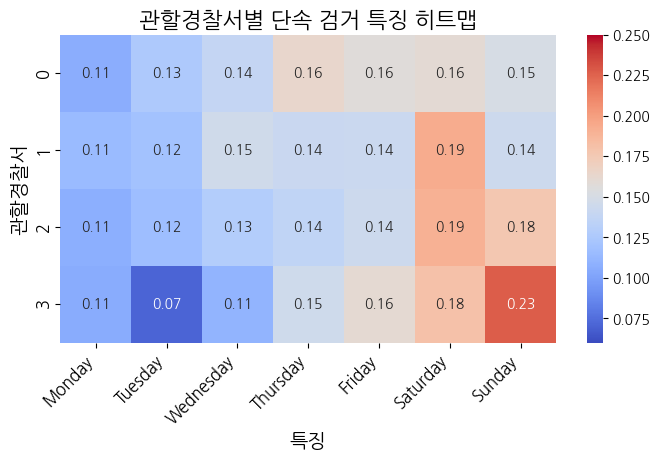

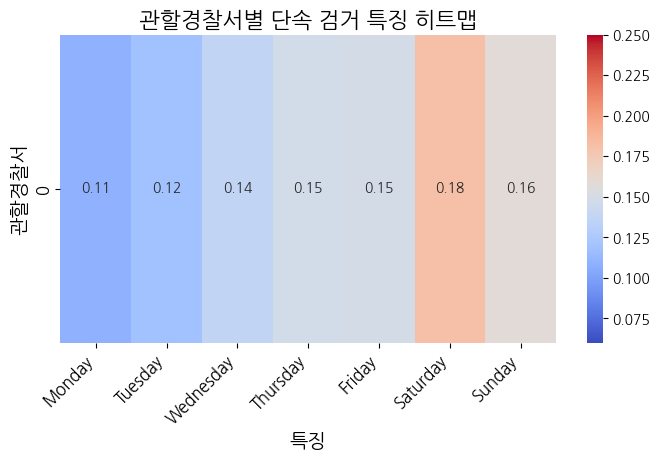

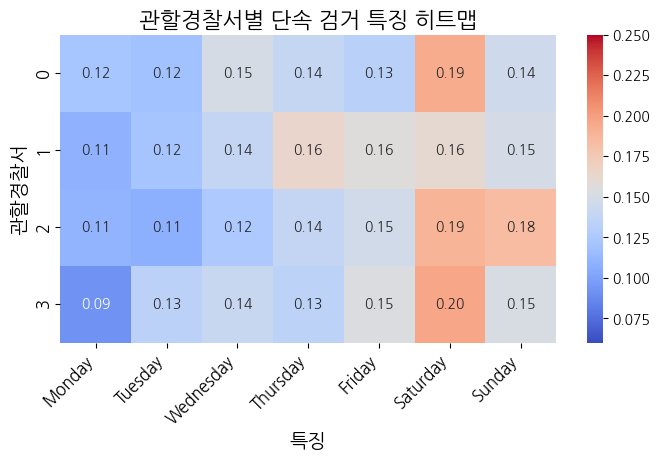

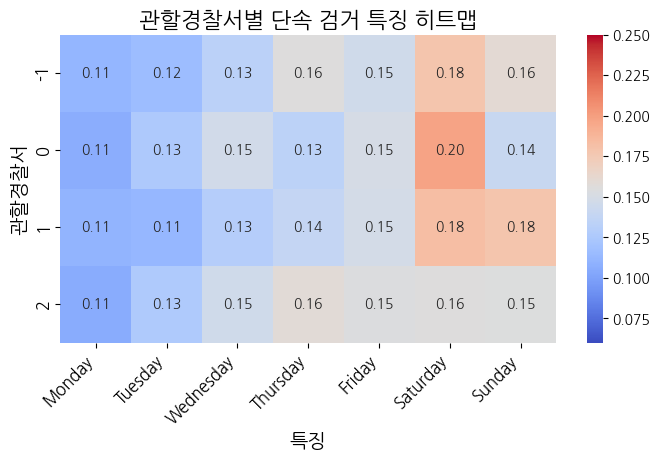

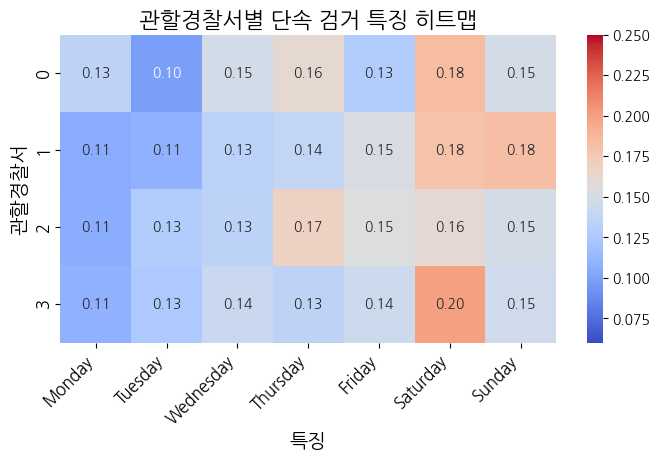

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means1[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means2[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means3[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means4[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means5[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            annot=True, cmap='coolwarm', fmt='.2f', vmin=0.06, vmax=0.25)
plt.title('관할경찰서별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('관할경찰서', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
import pandas as pd

# 클러스터 결과 데이터 준비
clusters = {
    'KMeans_0': ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '중구'],
    'KMeans_1': ['강남구', '강동구', '구로구', '동대문구', '동작구', '서대문구', '양천구', '종로구', '중랑구'],
    'KMeans_2': ['강북구', '관악구', '광진구', '금천구', '노원구', '마포구', '용산구'],
    'KMeans_3': ['도봉구'],
    'Autoencoder_0': ['구로구', '서초구', '성북구', '송파구', '영등포구', '종로구', '중랑구'],
    'Autoencoder_1': ['금천구', '노원구', '도봉구', '마포구', '서대문구', '양천구', '용산구'],
    'Autoencoder_2': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '동대문구', '동작구', '성동구'],
    'Autoencoder_3': ['은평구', '중구'],
    'tSNE_0': ['강동구', '구로구', '동대문구', '동작구', '중랑구'],
    'tSNE_1': ['강서구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구', '중구'],
    'tSNE_2': ['강북구', '관악구', '광진구', '노원구', '도봉구', '마포구', '용산구'],
    'tSNE_3': ['강남구', '금천구', '서대문구', '양천구'],
    'DBSCAN_-1': ['강서구', '구로구', '금천구', '노원구', '도봉구', '성동구', '영등포구', '은평구', '종로구', '중구', '중랑구'],
    'DBSCAN_0': ['강남구', '강동구', '동대문구', '동작구', '서대문구', '양천구'],
    'DBSCAN_1': ['강북구', '관악구', '광진구', '마포구', '용산구'],
    'DBSCAN_2': ['서초구', '성북구', '송파구'],
    'GMM_0': ['구로구', '종로구'],
    'GMM_1': ['강북구', '관악구', '광진구', '금천구', '도봉구', '마포구', '성동구', '용산구'],
    'GMM_2': ['강서구', '서초구', '성북구', '송파구', '영등포구', '은평구', '중구'],
    'GMM_3': ['강남구', '강동구', '노원구', '동대문구', '동작구', '서대문구', '양천구', '중랑구']
}

# 데이터프레임 생성
clustered_df = pd.DataFrame.from_dict(clusters, orient='index').transpose()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 데이터를 리스트 형식으로 변환
transactions = []
for col in clustered_df:
    transactions.append(clustered_df[col].dropna().tolist())

# 연관 분석을 위한 이진 매트릭스로 변환
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

# 빈발 항목 집합 찾기
frequent_itemsets = apriori(transactions_df, min_support=0.1, use_colnames=True)

# 연관 규칙 도출
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 결과 출력
print("연관 규칙:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


연관 규칙:
      antecedents                           consequents  support  confidence  \
0           (강동구)                                 (강남구)      0.2         0.8   
1           (강남구)                                 (강동구)      0.2         0.8   
2           (강남구)                                (동대문구)      0.2         0.8   
3          (동대문구)                                 (강남구)      0.2         0.8   
4           (동작구)                                 (강남구)      0.2         0.8   
...           ...                                   ...      ...         ...   
10309        (중구)  (송파구, 강서구, 은평구, 영등포구, 서초구, 성북구, 성동구)      0.1         0.4   
10310      (영등포구)    (송파구, 강서구, 은평구, 중구, 서초구, 성북구, 성동구)      0.1         0.4   
10311       (서초구)   (송파구, 강서구, 은평구, 중구, 영등포구, 성북구, 성동구)      0.1         0.4   
10312       (성북구)   (송파구, 강서구, 은평구, 중구, 영등포구, 서초구, 성동구)      0.1         0.4   
10313       (성동구)   (송파구, 강서구, 은평구, 중구, 영등포구, 서초구, 성북구)      0.1         0.4   

           lift  
0      3.20000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 연관 규칙 도출 (이전 단계에서 수행)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 더 중요한 규칙 필터링
important_rules = rules[(rules['lift'] >= 1.5) & (rules['confidence'] >= 0.7) & (rules['support'] >= 0.1)]

# 결과 출력
print("더 중요한 연관 규칙:")
print(important_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


더 중요한 연관 규칙:
            antecedents                     consequents  support  confidence  \
0                 (강동구)                           (강남구)      0.2         0.8   
1                 (강남구)                           (강동구)      0.2         0.8   
2                 (강남구)                          (동대문구)      0.2         0.8   
3                (동대문구)                           (강남구)      0.2         0.8   
4                 (동작구)                           (강남구)      0.2         0.8   
...                 ...                             ...      ...         ...   
10276  (성북구, 영등포구, 성동구)        (송파구, 강서구, 은평구, 중구, 서초구)      0.1         1.0   
10277   (성북구, 성동구, 서초구)       (송파구, 강서구, 은평구, 중구, 영등포구)      0.1         1.0   
10284        (송파구, 성동구)  (강서구, 은평구, 중구, 영등포구, 서초구, 성북구)      0.1         1.0   
10304        (성동구, 서초구)  (송파구, 강서구, 은평구, 중구, 영등포구, 성북구)      0.1         1.0   
10305        (성북구, 성동구)  (송파구, 강서구, 은평구, 중구, 영등포구, 서초구)      0.1         1.0   

           lift  
0      3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 연관 규칙 도출 (이전 단계에서 수행)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# `lift` 값 기준으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 상위 20개 연관 규칙 출력 (필요에 따라 수 조정 가능)
top_rules = sorted_rules.head(20)

# 결과 출력
print("상위 20개 연관 규칙:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


상위 20개 연관 규칙:
                antecedents                 consequents  support  confidence  \
9023       (양천구, 강남구, 동대문구)       (동작구, 강동구, 서대문구, 중랑구)     0.10    0.666667   
6369         (은평구, 성북구, 중구)                  (송파구, 성동구)     0.10    0.666667   
2420             (송파구, 강서구)                  (성북구, 은평구)     0.15    1.000000   
8691  (은평구, 영등포구, 성동구, 서초구)                   (성북구, 중구)     0.10    1.000000   
2422             (송파구, 은평구)                  (강서구, 성북구)     0.15    1.000000   
2423             (강서구, 성북구)                  (송파구, 은평구)     0.15    1.000000   
6318             (은평구, 성북구)            (송파구, 영등포구, 성동구)     0.10    0.666667   
2425             (성북구, 은평구)                  (송파구, 강서구)     0.15    1.000000   
6316             (송파구, 성동구)            (은평구, 영등포구, 성북구)     0.10    1.000000   
9159             (강서구, 성북구)  (송파구, 은평구, 영등포구, 서초구, 성동구)     0.10    0.666667   
6313             (송파구, 은평구)            (성북구, 영등포구, 성동구)     0.10    0.666667   
6312       (성북구, 영등포구, 성동구

In [ ]:
top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
9023,"(양천구, 강남구, 동대문구)","(동작구, 강동구, 서대문구, 중랑구)",0.10,0.666667,6.666667
6369,"(은평구, 성북구, 중구)","(송파구, 성동구)",0.10,0.666667,6.666667
2420,"(송파구, 강서구)","(성북구, 은평구)",0.15,1.000000,6.666667
8691,"(은평구, 영등포구, 성동구, 서초구)","(성북구, 중구)",0.10,1.000000,6.666667
2422,"(송파구, 은평구)","(강서구, 성북구)",0.15,1.000000,6.666667
2423,"(강서구, 성북구)","(송파구, 은평구)",0.15,1.000000,6.666667
6318,"(은평구, 성북구)","(송파구, 영등포구, 성동구)",0.10,0.666667,6.666667
2425,"(성북구, 은평구)","(송파구, 강서구)",0.15,1.000000,6.666667
6316,"(송파구, 성동구)","(은평구, 영등포구, 성북구)",0.10,1.000000,6.666667
9159,"(강서구, 성북구)","(송파구, 은평구, 영등포구, 서초구, 성동구)",0.10,0.666667,6.666667


##3.월별(4개)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



월별클러스터 0:
['강북구', '용산구', '광진구', '송파구', '성북구', '성동구', '동작구']

월별클러스터 1:
['강남구', '종로구', '은평구', '영등포구', '서초구', '마포구', '관악구', '강서구', '중랑구']

월별클러스터 2:
['동대문구', '노원구', '금천구', '양천구', '구로구', '강동구']

월별클러스터 3:
['서대문구', '도봉구', '중구']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              1월        2월        3월        4월        5월        6월        7월  \
월별클러스터                                                                         
0       0.052746  0.058688  0.065409  0.072405  0.099215  0.093562  0.105553   
1       0.069913  0.051784  0.062901  0.098197  0.095334  0.091915  0.094389   
2       0.086604  0.061051  0.080873  0.072228  0.077171  0.097835  0.091664   
3       0.065363  0.065504  0.078362  0.102002  0.078905  0.104214  0.121109   

              8월        9월       10월       11월       12월  
월별클러스터                                                    
0       0.088441  0.105317  0.107767  0.068783  0.082115  
1       0.087620  0.095621  0.090894  0.078294  0.083137  
2       0.086087  0.087323  0.086711  0.075585  0.096867  
3       0.063869  0.072522  0.079618  0.072179  0.096354  


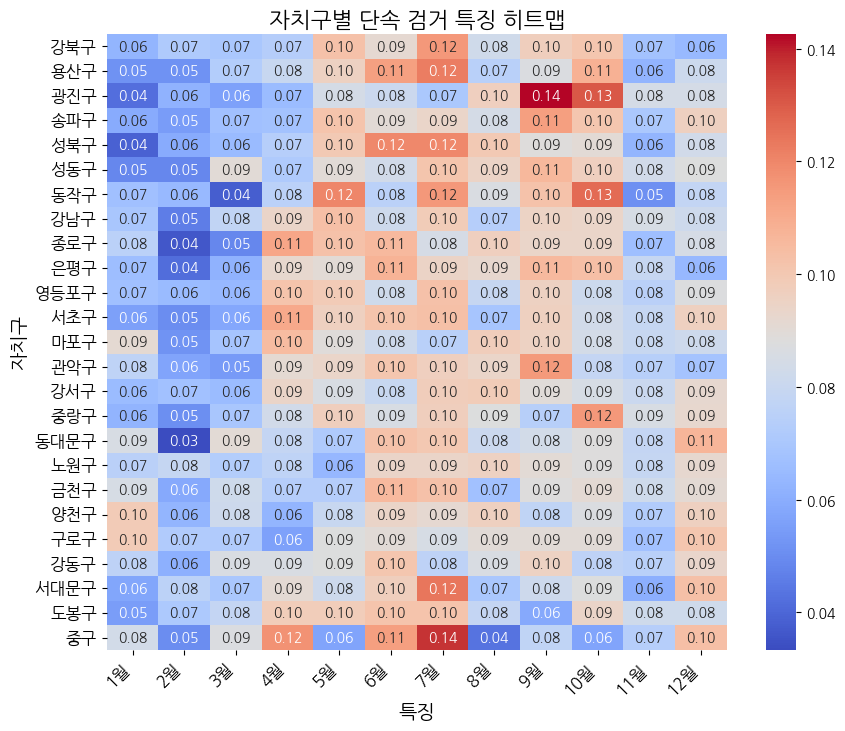

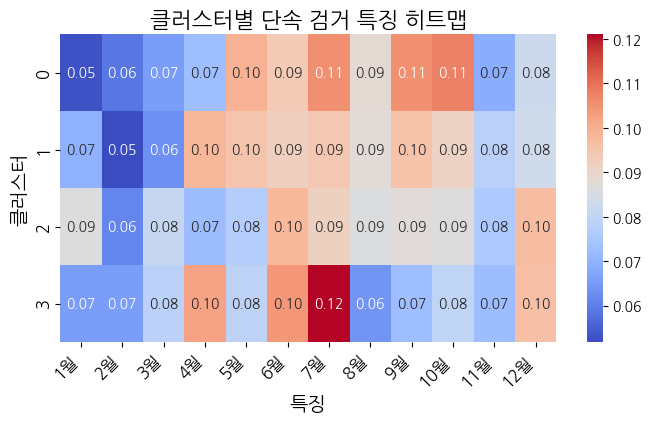

In [ ]:
# 클러스터 변수 설정
columns=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
cluster_name='월별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##4.연령별(4개)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



연령별클러스터 0:
['강동구', '구로구', '영등포구']

연령별클러스터 1:
['마포구', '강북구', '관악구', '광진구', '성동구', '동작구', '서대문구']

연령별클러스터 2:
['은평구', '양천구', '성북구', '중랑구', '동대문구', '도봉구', '노원구', '금천구']

연령별클러스터 3:
['서초구', '송파구', '용산구', '강서구', '종로구', '중구', '강남구']

              10대       20대       30대       40대       50대       60대       70대  \
연령별클러스터                                                                         
0        0.012656  0.172746  0.314938  0.258060  0.172940  0.062330  0.006330   
1        0.026396  0.313155  0.272603  0.186215  0.147585  0.046573  0.005913   
2        0.019965  0.207961  0.237577  0.266651  0.197076  0.062026  0.008743   
3        0.016378  0.257034  0.330389  0.224353  0.126072  0.039002  0.005942   

          80대 이상  
연령별클러스터           
0        0.00000  
1        0.00156  
2        0.00000  
3        0.00083  


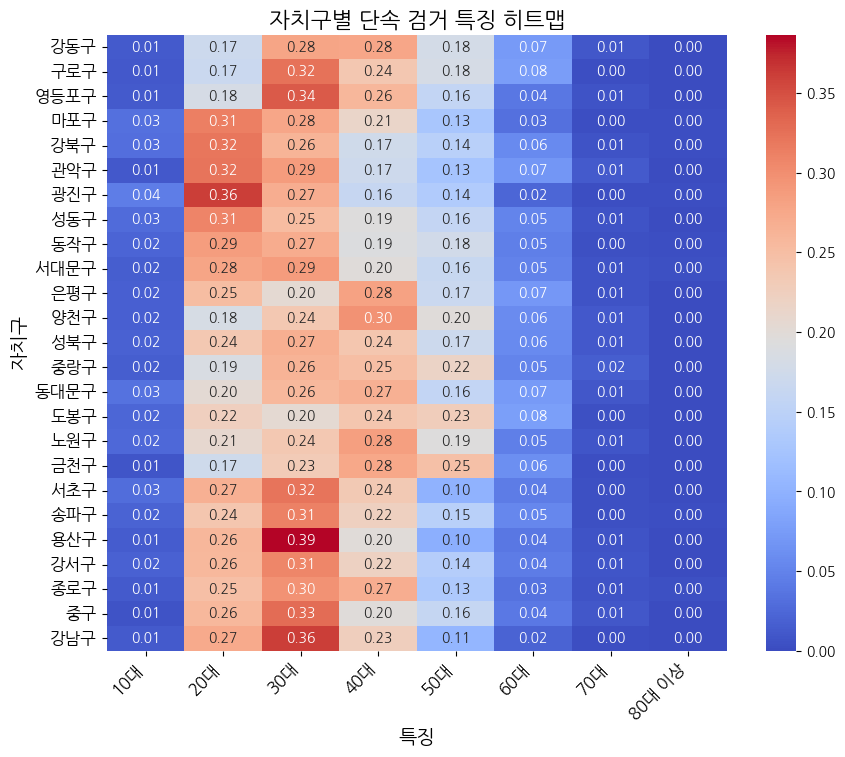

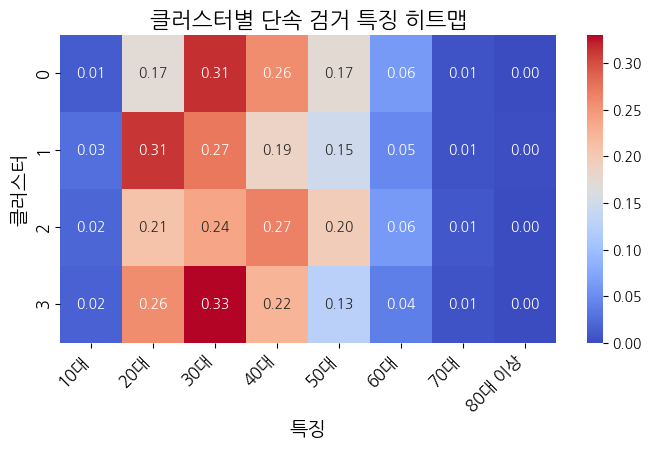

In [ ]:
# 클러스터 변수 설정
columns=['10대', '20대', '30대', '40대', '50대', '60대',   '70대', '80대 이상']
cluster_name='연령별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##5.시간대별 (3개)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



시간별클러스터 0:
['강남구', '은평구', '용산구', '성동구', '서초구', '서대문구', '동작구', '동대문구', '마포구', '광진구', '관악구', '노원구']

시간별클러스터 1:
['도봉구', '금천구', '구로구', '양천구', '중랑구']

시간별클러스터 2:
['중구', '강서구', '성북구', '송파구', '영등포구', '강북구', '강동구', '종로구']

         Late Night  Early Morning   Morning  Afternoon   Evening     Night
시간별클러스터                                                                    
0          0.395834       0.144002  0.066896   0.028610  0.059976  0.304682
1          0.322586       0.168737  0.051908   0.042233  0.086511  0.328025
2          0.352106       0.120611  0.051675   0.032370  0.050887  0.392352


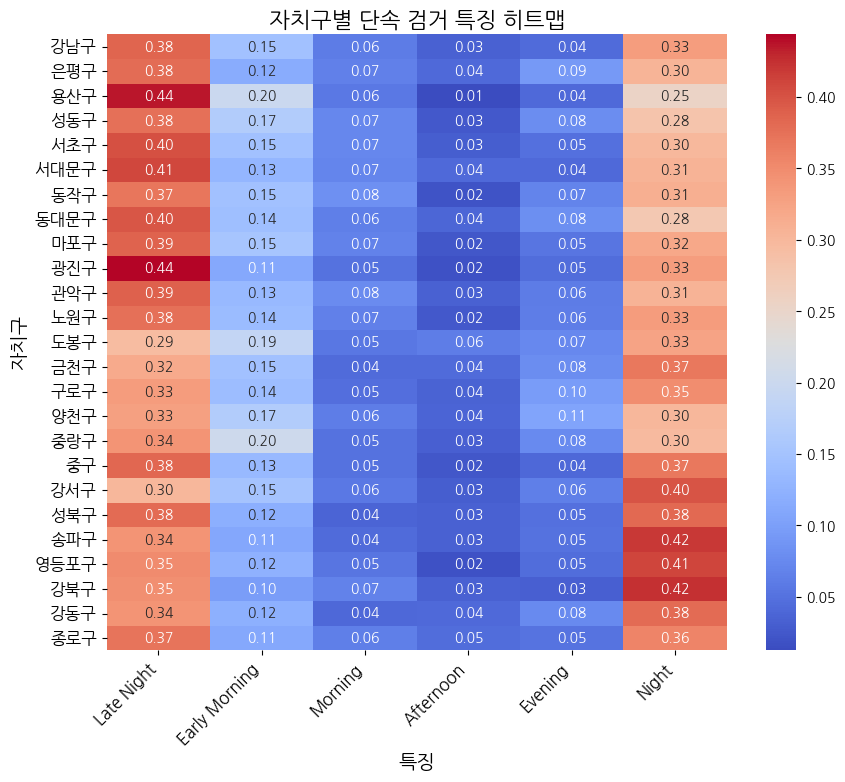

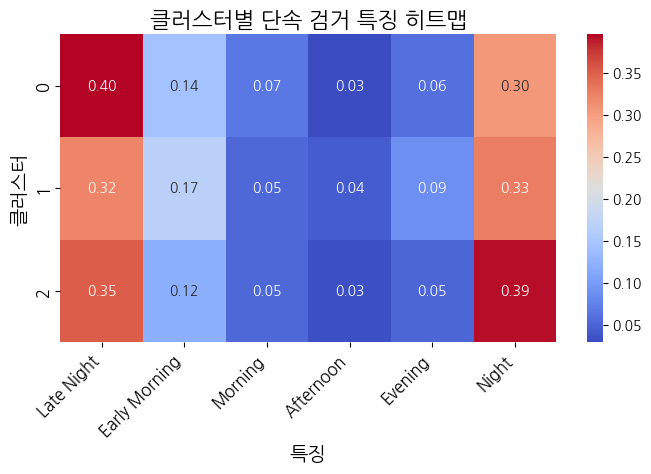

In [ ]:
# 클러스터 변수 설정
columns=['Late Night', 'Early Morning', 'Morning', 'Afternoon',  'Evening', 'Night']
cluster_name='시간별클러스터'

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled2[columns])

# 클러스터 결과를 데이터프레임에 추가
scaled2[cluster_name] = clusters

# 클러스터 번호로 정렬
caught_proc_sorted = scaled2.sort_values(by=cluster_name)

# 출력코드
# 각 클러스터에 포함된 자치구 출력
for cluster in sorted(caught_proc_sorted[cluster_name].unique()):
    print()
    print(f"{cluster_name} {cluster}:")
    print(caught_proc_sorted[caught_proc_sorted[cluster_name] == cluster].index.tolist())


# 각 클러스터의 값들의 평균 계산
cluster_means = scaled2.groupby(cluster_name).mean()

# 출력코드
# 각 클러스터 평균 계산 출력
print()
print(cluster_means[columns])

# 히트맵 시각화에 포함할 컬럼 설정
caught_proc_for_heatmap = caught_proc_sorted[columns]

# 히트맵 시각화
# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(caught_proc_for_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('자치구별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 히트맵 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means[columns], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('클러스터별 단속 검거 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##1.성별(변수1개)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


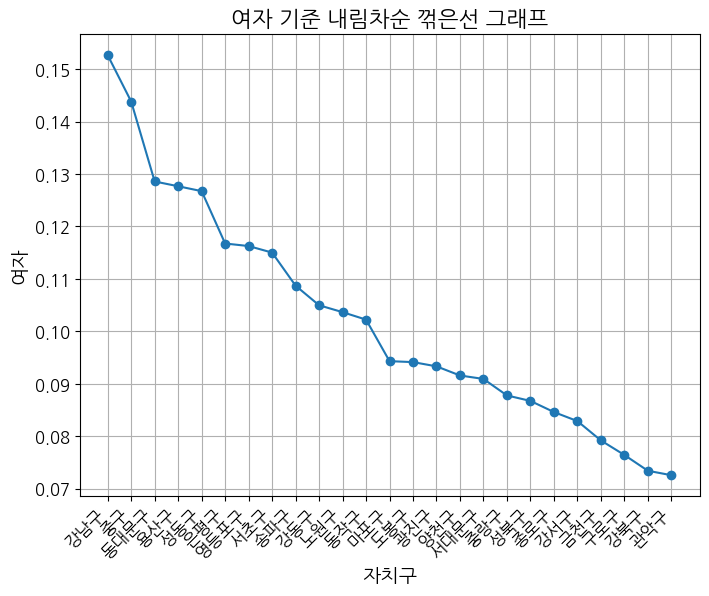

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = scaled2.sort_values(by='여자', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['여자'], marker='o', linestyle='-')
plt.title('여자 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('여자', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


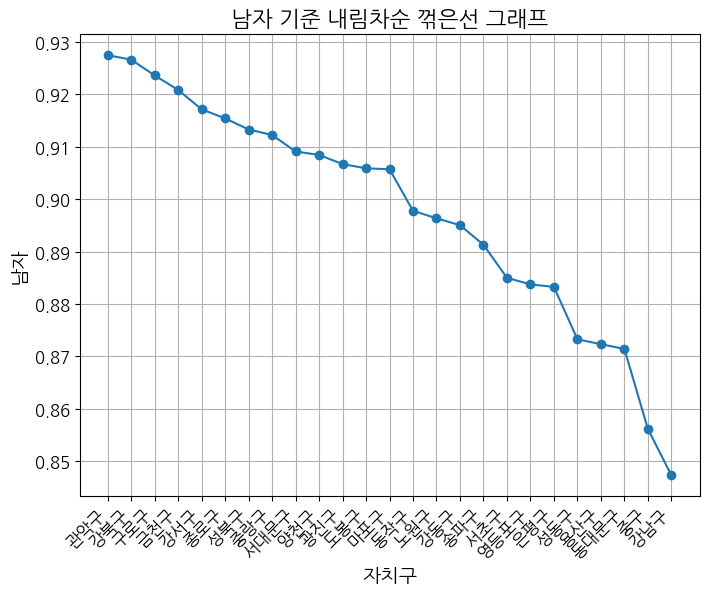

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = scaled2.sort_values(by='남자', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['남자'], marker='o', linestyle='-')
plt.title('남자 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('남자', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

##6.알콜농도별 (변수1개)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


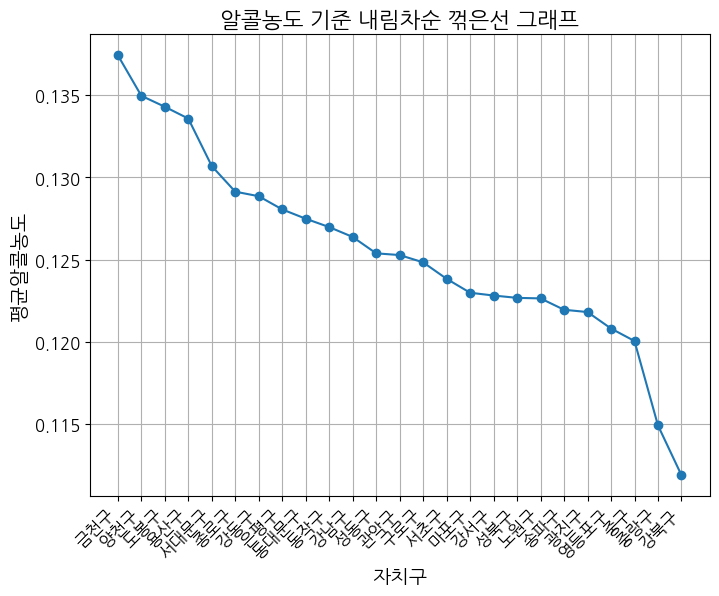

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = scaled2.sort_values(by='평균알콜농도', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['평균알콜농도'], marker='o', linestyle='-')
plt.title('알콜농도 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('평균알콜농도', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

##7.적발횟수별 (변수1개)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


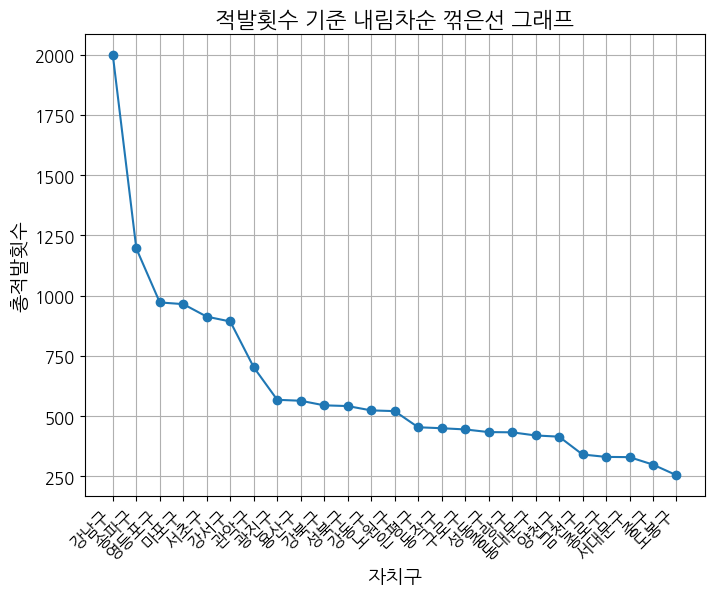

In [ ]:
# scaled2 데이터프레임을 열 기준으로 내림차순 정렬
df1_sorted = caught_proc.sort_values(by='총적발횟수', ascending=False)

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df1_sorted['총적발횟수'], marker='o', linestyle='-')
plt.title('적발횟수 기준 내림차순 꺾은선 그래프', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('총적발횟수', fontsize=14)
plt.xticks(ticks=range(len(df1_sorted)), labels=df1_sorted.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# 6.전체 데이터 탐색

In [ ]:
scaled2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['남자', '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월',
       '9월', '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대',
       '70대', '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수', '요일별클러스터', 'Autoencoder_클러스터',
       'tSNE_클러스터', 'DBSCAN_클러스터', 'GMM_클러스터', '월별클러스터', '연령별클러스터', '시간별클러스터'],
      dtype='object')

In [ ]:
df_total = scaled2[['요일별클러스터','GMM_클러스터', '월별클러스터', '연령별클러스터', '시간별클러스터','남자', '평균알콜농도', '총적발횟수']]
df_total.rename(columns={'남자':'남자비율'},inplace=True)
df_total

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-168-4f5d8da614af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.rename(columns={'남자':'남자비율'},inplace=True)


,요일별클러스터,GMM_클러스터,월별클러스터,연령별클러스터,시간별클러스터,남자비율,평균알콜농도,총적발횟수
자치구,,,,,,,,
강남구,1,3,1,3,0,0.847347,0.126381,1
강동구,1,3,2,0,2,0.895038,0.128860,1
강북구,2,1,0,1,2,0.926606,0.111877,1
강서구,0,2,1,3,2,0.917133,0.122815,1
관악구,2,1,1,1,0,0.927454,0.125279,1
광진구,2,1,0,1,0,0.906690,0.121810,1
구로구,1,0,2,0,1,0.923596,0.124835,1
금천구,2,1,2,2,1,0.920821,0.137443,1
노원구,2,3,2,2,0,0.896353,0.122640,1


In [ ]:
# 맵핑정의
mapping1 = {0: '목금토', 1: '토', 2: '주말', 3: '일'}
mapping2 = {0: '수목토', 1: '주말', 2: '목금토', 3: '토'}
mapping3 = {0: '7-9-10', 1: '4-5-9', 2: '6-12', 3: '4-6-7-12'}
mapping4 = {0: '30-40', 1: '20-30', 2: '40', 3: '30'}
mapping5 = {0: '0-4', 1: '20-8', 2: '20-24'}

# 열 'B'의 값을 매핑을 통해 변환
df_total['요일별클러스터'] = df_total['요일별클러스터'].map(mapping1)
df_total['GMM_클러스터'] = df_total['GMM_클러스터'].map(mapping2)
df_total['월별클러스터'] = df_total['월별클러스터'].map(mapping3)
df_total['연령별클러스터'] = df_total['연령별클러스터'].map(mapping4)
df_total['시간별클러스터'] = df_total['시간별클러스터'].map(mapping5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-169-28bdedc22084>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['요일별클러스터'] = df_total['요일별클러스터'].map(mapping1)
<ipython-input-169-28bdedc22084>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
df_total

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,요일별클러스터,GMM_클러스터,월별클러스터,연령별클러스터,시간별클러스터,남자비율,평균알콜농도,총적발횟수
자치구,,,,,,,,
강남구,토,토,4-5-9,30,0-4,0.847347,0.126381,1
강동구,토,토,6-12,30-40,20-24,0.895038,0.128860,1
강북구,주말,주말,7-9-10,20-30,20-24,0.926606,0.111877,1
강서구,목금토,목금토,4-5-9,30,20-24,0.917133,0.122815,1
관악구,주말,주말,4-5-9,20-30,0-4,0.927454,0.125279,1
광진구,주말,주말,7-9-10,20-30,0-4,0.906690,0.121810,1
구로구,토,수목토,6-12,30-40,20-8,0.923596,0.124835,1
금천구,주말,주말,6-12,40,20-8,0.920821,0.137443,1
노원구,주말,토,6-12,40,0-4,0.896353,0.122640,1
